In [8]:
import torch
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
from tqdm import tqdm

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
import matplotlib.pyplot as plt

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim: int, generated_dim: int):
        super().__init__()
        self.latent_dim = latent_dim
        self.generated_dim = generated_dim
        self.fc1 = nn.Linear(self.latent_dim, 100)
        self.lrelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(100, 150)
        self.lrelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(150, generated_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.lrelu1(self.fc1(x))
        x = self.lrelu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
x = torch.randn(32, 2)
generator = Generator(2, 784)
generator(x).size()

torch.Size([32, 784])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, img_dim: int):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(img_dim, 150)
        self.lrelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(150, 100)
        self.lrelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.flatten(x)
        x = self.lrelu1(self.fc1(x))
        x = self.lrelu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
x = torch.randn(32, 1, 28, 28)
discriminator = Discriminator(784)
discriminator(x.reshape(-1, 784)).size()

torch.Size([32, 1])

In [3]:
batch_size = 32

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True,
                                      transform=ToTensor())
train_dloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 16217312.91it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270831.44it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5081048.27it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8727678.65it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
def freez_params(model):
    for p in model.parameters():
        p.requires_grad = False

In [ ]:
def unfreeze_params(model):
    for p in model.parameters():
        p.requires_grad = True

In [ ]:
generator = Generator(2, 784)
discriminator = Discriminator(784)

criterion = nn.BCELoss()
optimizer_discriminator = torch.optim.RMSprop(discriminator.parameters(), lr=0.001)
optimizer_generator = torch.optim.RMSprop(generator.parameters(), lr=0.001)

100%|██████████| 1875/1875 [00:24<00:00, 75.35it/s]


Epoch 1/20


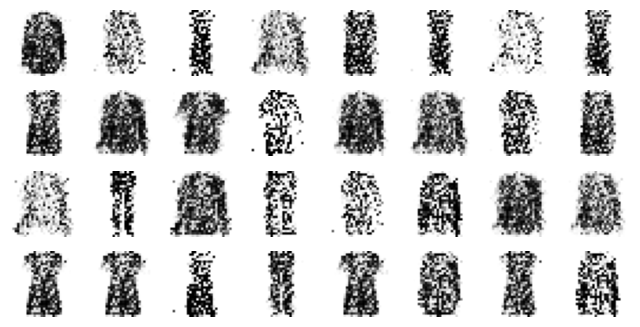

100%|██████████| 1875/1875 [00:26<00:00, 69.90it/s]


Epoch 2/20


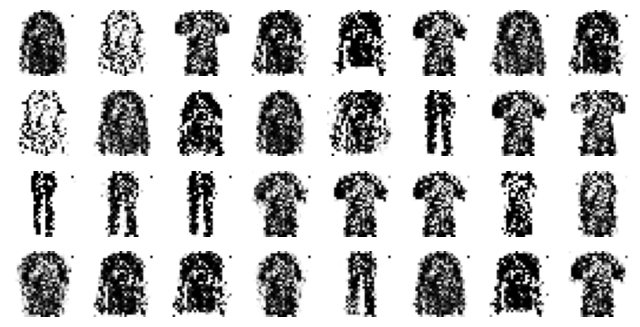

100%|██████████| 1875/1875 [00:27<00:00, 68.61it/s]


Epoch 3/20


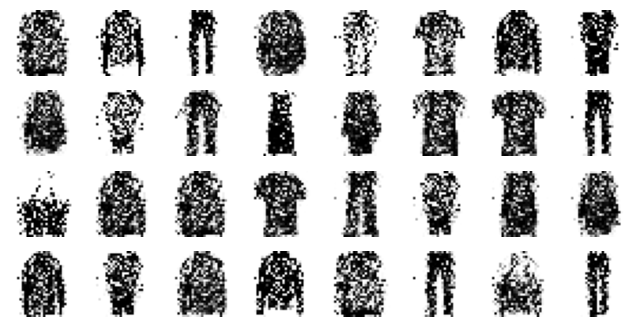

100%|██████████| 1875/1875 [00:27<00:00, 68.66it/s]


Epoch 4/20


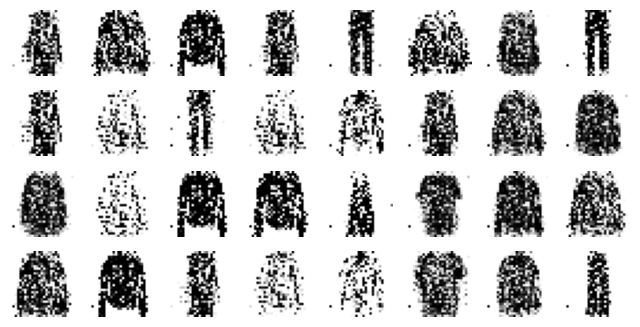

100%|██████████| 1875/1875 [00:28<00:00, 65.98it/s]


Epoch 5/20


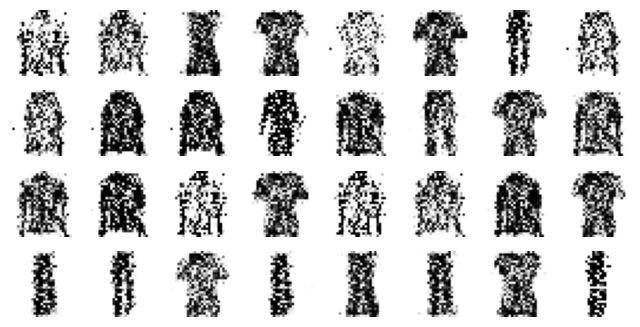

100%|██████████| 1875/1875 [00:27<00:00, 67.51it/s]


Epoch 6/20


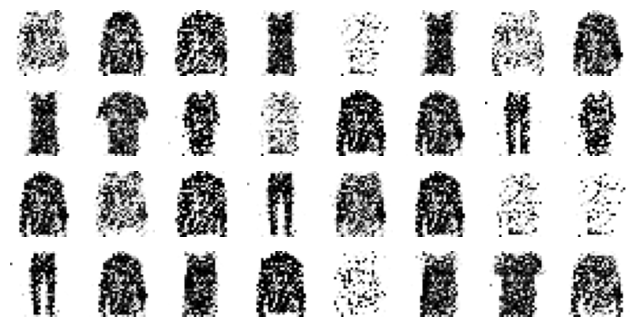

100%|██████████| 1875/1875 [00:27<00:00, 67.78it/s]


Epoch 7/20


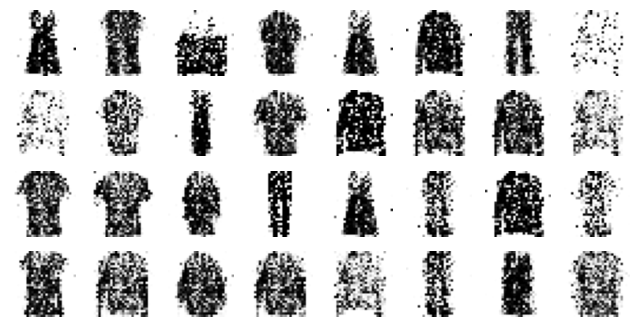

100%|██████████| 1875/1875 [00:27<00:00, 68.02it/s]


Epoch 8/20


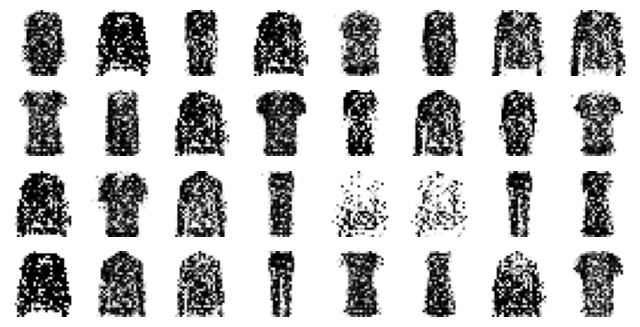

100%|██████████| 1875/1875 [00:27<00:00, 69.07it/s]


Epoch 9/20


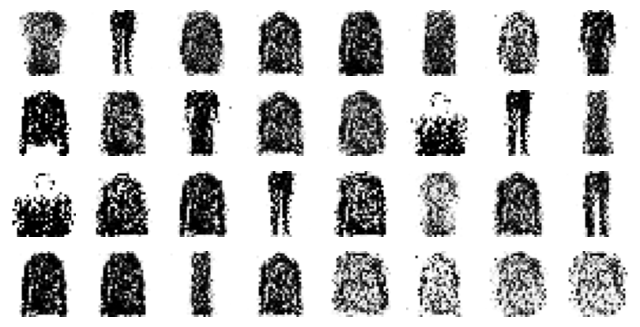

100%|██████████| 1875/1875 [00:26<00:00, 69.46it/s]


Epoch 10/20


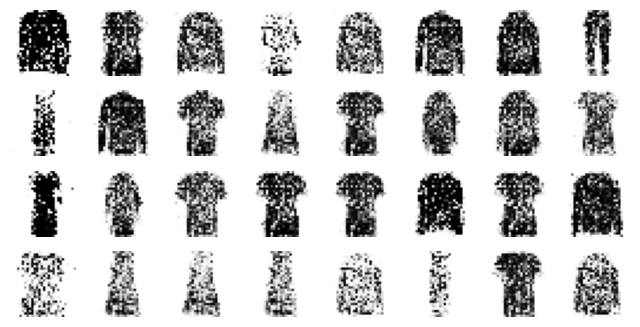

100%|██████████| 1875/1875 [00:28<00:00, 66.59it/s]


Epoch 11/20


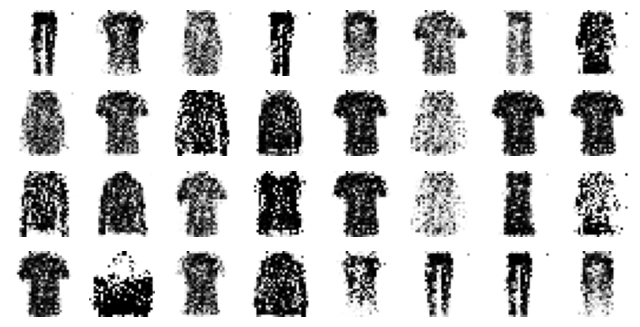

100%|██████████| 1875/1875 [00:29<00:00, 63.13it/s]


Epoch 12/20


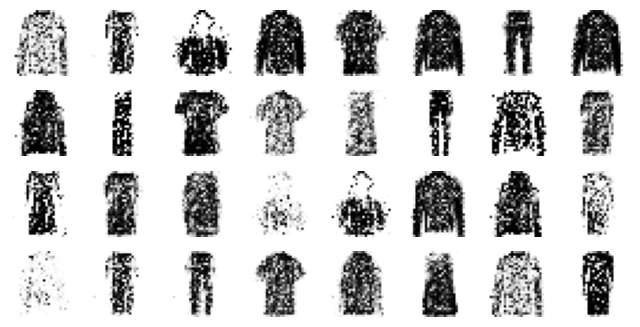

100%|██████████| 1875/1875 [00:31<00:00, 60.23it/s]


Epoch 13/20


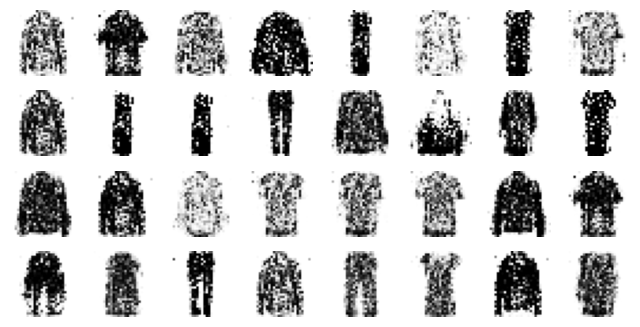

100%|██████████| 1875/1875 [00:31<00:00, 60.40it/s]


Epoch 14/20


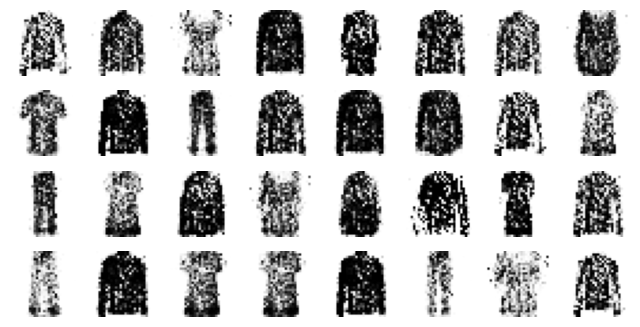

100%|██████████| 1875/1875 [00:31<00:00, 59.05it/s]


Epoch 15/20


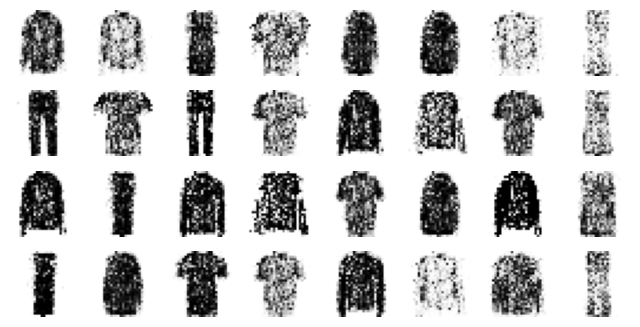

100%|██████████| 1875/1875 [00:32<00:00, 57.72it/s]


Epoch 16/20


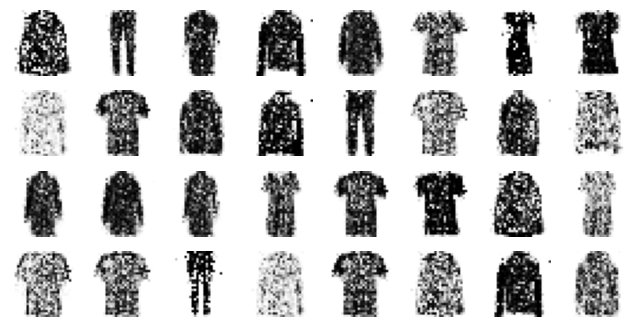

100%|██████████| 1875/1875 [00:31<00:00, 59.86it/s]


Epoch 17/20


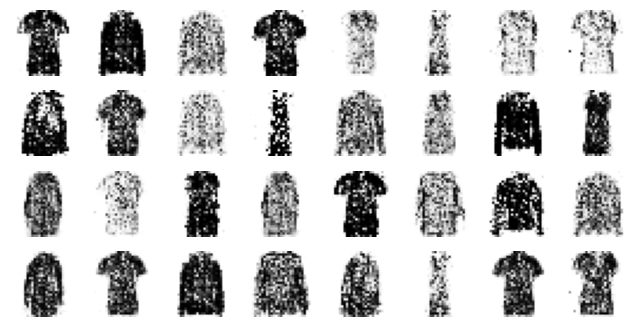

100%|██████████| 1875/1875 [00:31<00:00, 59.61it/s]


Epoch 18/20


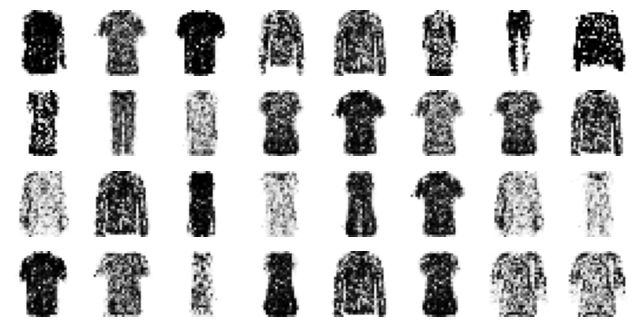

100%|██████████| 1875/1875 [00:33<00:00, 56.79it/s]


Epoch 19/20


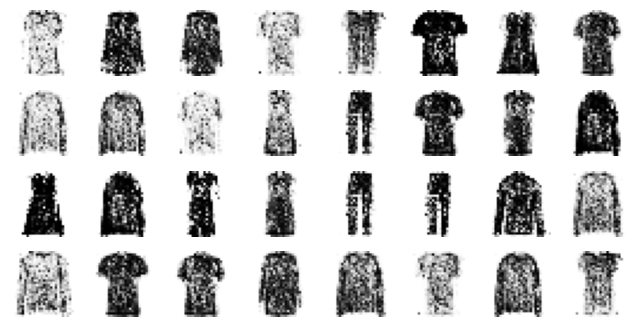

100%|██████████| 1875/1875 [00:32<00:00, 57.22it/s]


Epoch 20/20


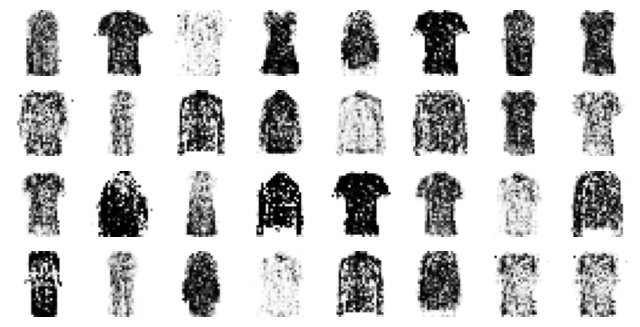

In [ ]:
epoch_num = 20
torch.manual_seed(42)

for epoch in range(epoch_num):
    for image, _ in tqdm(train_dloader):
        unfreeze_params(discriminator)
        noise = torch.randn(batch_size, 2)
        fake_img = generator(noise).reshape(-1, 1, 28, 28)
        batch_fake_real = torch.concat([image, fake_img], axis=0)
        discriminator_labels = torch.concat([torch.ones(batch_size, 1),
                                             torch.zeros(batch_size, 1)], axis=0)
        prediction = discriminator(batch_fake_real)
        loss = criterion(prediction, discriminator_labels)

        optimizer_discriminator.zero_grad()
        loss.backward()
        optimizer_discriminator.step()

        freez_params(discriminator)

        noise = torch.randn(batch_size, 2)
        fake_img = generator(noise).reshape(-1, 1, 28, 28)

        generator_labels = torch.ones(batch_size, 1)
        predictions = discriminator(fake_img)

        loss = criterion(predictions, generator_labels)

        optimizer_generator.zero_grad()
        loss.backward()
        optimizer_generator.step()
    print(f"Epoch {epoch + 1}/{epoch_num}")  # extra code
    plot_multiple_images(fake_img.squeeze().detach().cpu().numpy(), 8)
    plt.show()

In [4]:
class DCGenerator(nn.Module):
    def __init__(self, latent_dim: int):
        super().__init__()
        self.fc1 = nn.Linear(latent_dim, 128 * 7 * 7)
        self.unflatten = nn.Unflatten(1, (128, 7, 7))
        self.bn1 = nn.BatchNorm2d(128)
        self.cnn_transpose1 = nn.ConvTranspose2d(128, 64, kernel_size=5,
                                                 stride=2, padding=2, output_padding=1)
        self.relu1 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(64)
        self.cnn_transpose2 = nn.ConvTranspose2d(64, 1, kernel_size=5,
                                            stride=2, padding=2, output_padding=1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc1(x)
        x = self.unflatten(x)
        x = self.bn1(x)
        x = self.relu1(self.cnn_transpose1(x))
        x = self.bn2(x)
        x = self.cnn_transpose2(x)
        x = self.tanh(x)
        return x

In [5]:
class DCDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn1 = nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2)
        self.lrelu1 = nn.LeakyReLU(0.2)
        self.dropout1 = nn.Dropout(0.4)
        self.cnn2 = nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2)
        self.lrelu2 = nn.LeakyReLU(0.2)
        self.dropout2 = nn.Dropout(0.4)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(7*7*128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.lrelu1(self.cnn1(x))
        x = self.dropout1(x)
        x = self.lrelu2(self.cnn2(x))
        x = self.dropout2(x)
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        return x

In [9]:
batch_size = 32

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True,
                                      transform=ToTensor())
train_dloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 15199204.44it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272900.16it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5061576.28it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 25283696.71it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [10]:
coding_dim = 100

generator = DCGenerator(coding_dim).to(device)
discriminator = DCDiscriminator().to(device)

criterion = nn.BCELoss()
optimizer_discriminator = torch.optim.RMSprop(discriminator.parameters(), lr=0.001)
optimizer_generator = torch.optim.RMSprop(generator.parameters(), lr=0.001)

100%|██████████| 1875/1875 [00:21<00:00, 87.44it/s]


Epoch 1/20


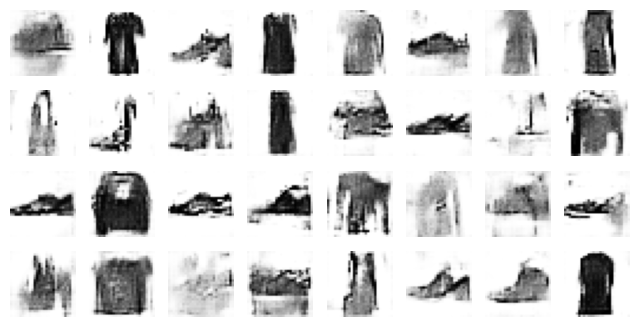

100%|██████████| 1875/1875 [00:20<00:00, 92.91it/s]


Epoch 2/20


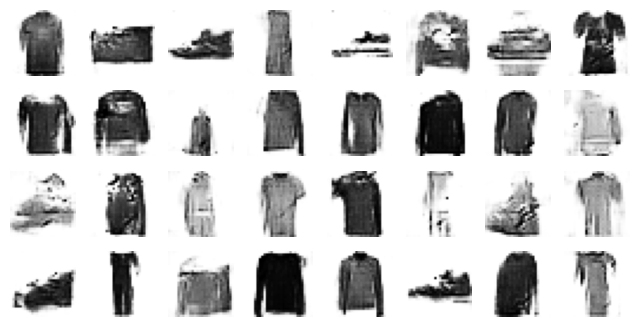

100%|██████████| 1875/1875 [00:20<00:00, 92.36it/s]


Epoch 3/20


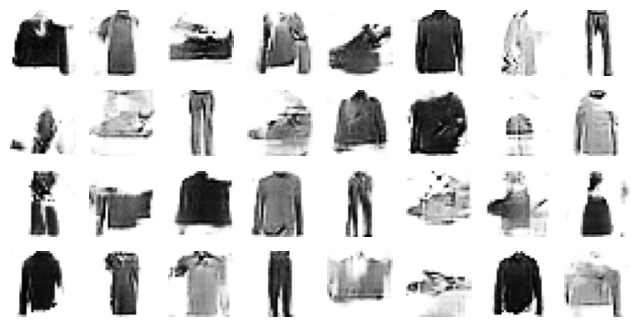

100%|██████████| 1875/1875 [00:19<00:00, 93.81it/s]


Epoch 4/20


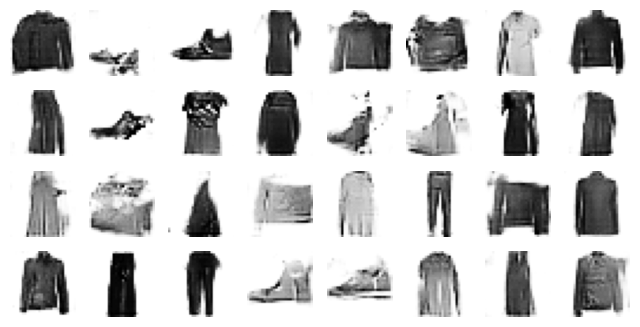

100%|██████████| 1875/1875 [00:20<00:00, 89.56it/s]


Epoch 5/20


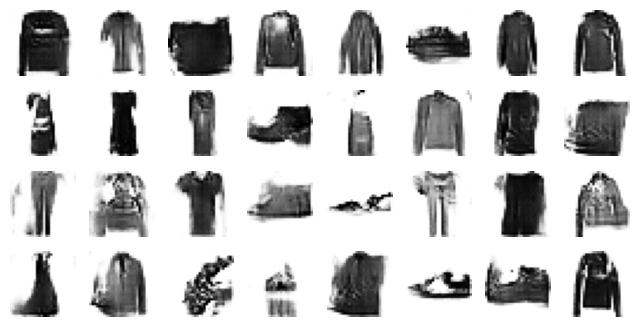

100%|██████████| 1875/1875 [00:20<00:00, 89.61it/s]


Epoch 6/20


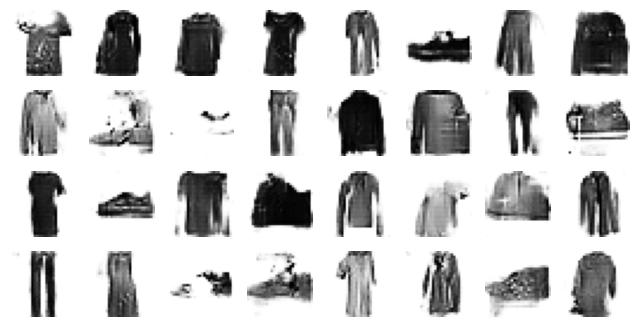

100%|██████████| 1875/1875 [00:21<00:00, 89.03it/s]


Epoch 7/20


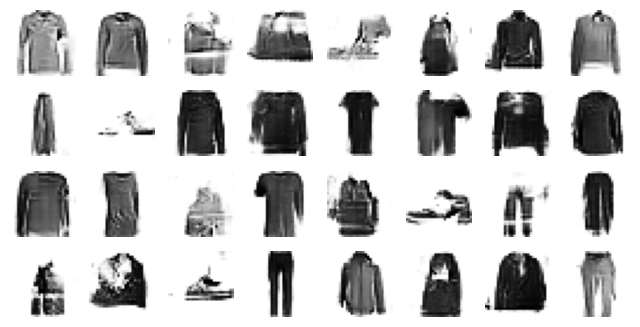

100%|██████████| 1875/1875 [00:20<00:00, 92.38it/s]


Epoch 8/20


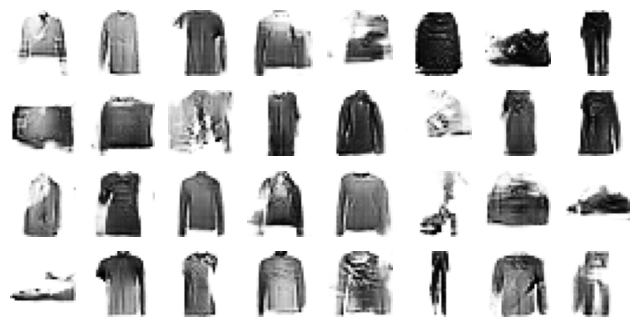

100%|██████████| 1875/1875 [00:21<00:00, 86.91it/s]


Epoch 9/20


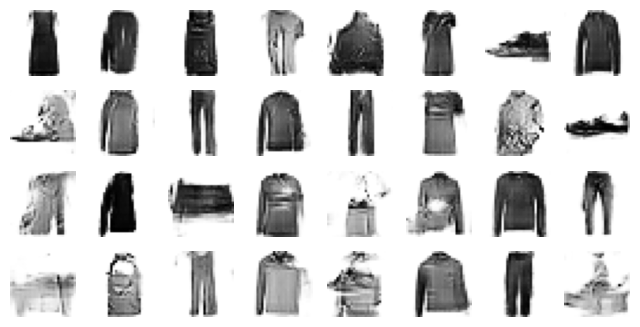

100%|██████████| 1875/1875 [00:21<00:00, 88.61it/s]


Epoch 10/20


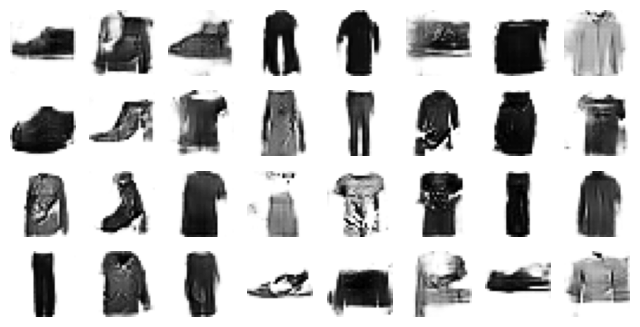

100%|██████████| 1875/1875 [00:21<00:00, 88.08it/s]


Epoch 11/20


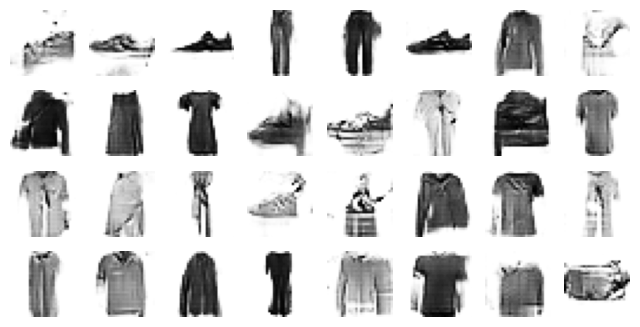

100%|██████████| 1875/1875 [00:20<00:00, 90.29it/s]


Epoch 12/20


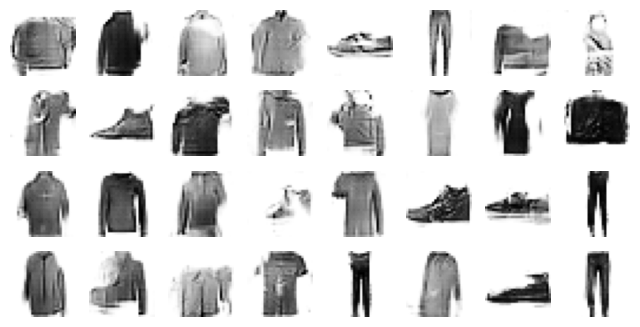

100%|██████████| 1875/1875 [00:21<00:00, 89.08it/s]


Epoch 13/20


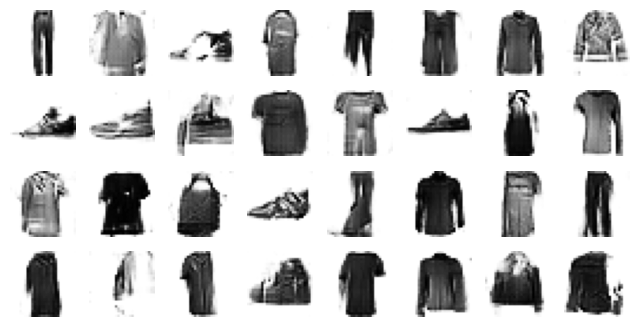

100%|██████████| 1875/1875 [00:21<00:00, 87.20it/s]


Epoch 14/20


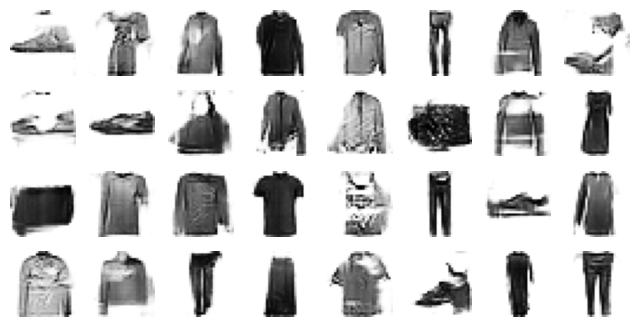

100%|██████████| 1875/1875 [00:21<00:00, 86.76it/s]


Epoch 15/20


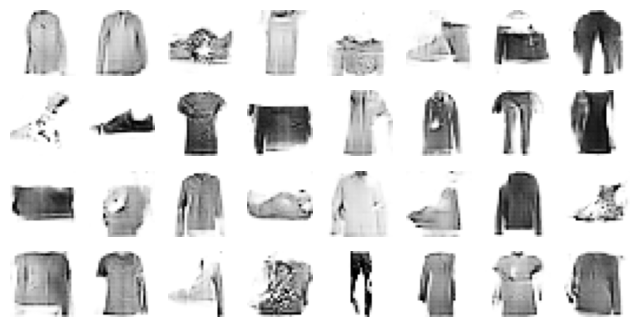

100%|██████████| 1875/1875 [00:22<00:00, 84.89it/s]


Epoch 16/20


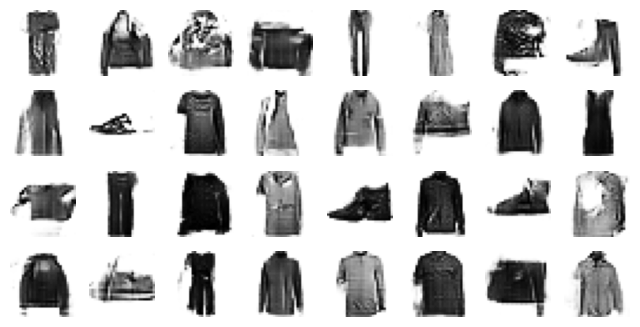

100%|██████████| 1875/1875 [00:21<00:00, 86.08it/s]


Epoch 17/20


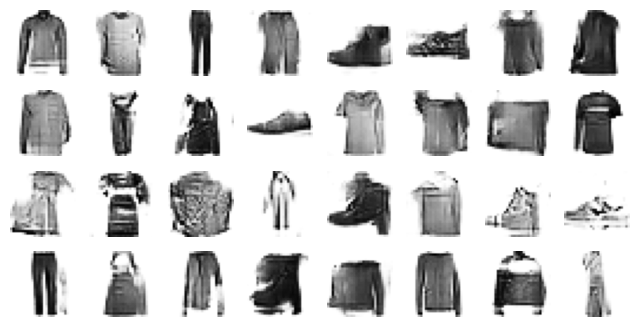

100%|██████████| 1875/1875 [00:21<00:00, 85.51it/s]


Epoch 18/20


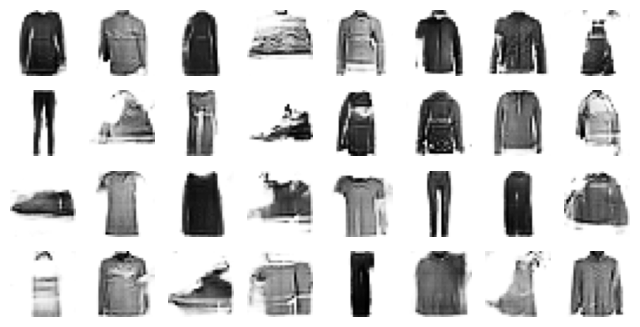

100%|██████████| 1875/1875 [00:22<00:00, 83.86it/s]


Epoch 19/20


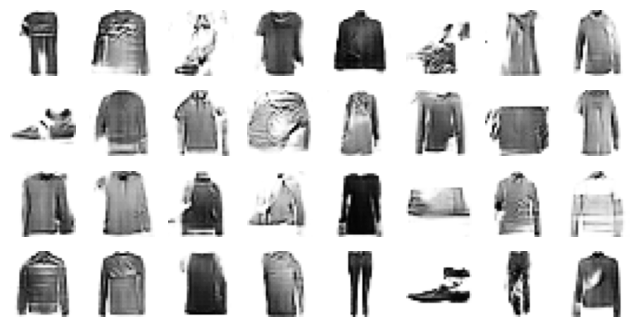

100%|██████████| 1875/1875 [00:22<00:00, 81.95it/s]


Epoch 20/20


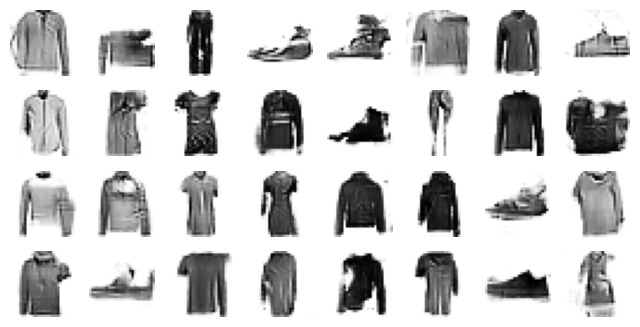

In [11]:
epoch_num = 20
torch.manual_seed(42)

for epoch in range(epoch_num):
    for image, _ in tqdm(train_dloader):
        image = image.to(device)
        image = image * 2 - 1 # generator using tanh!
        noise = torch.randn(batch_size, coding_dim).to(device)
        fake_img = generator(noise)
        batch_fake_real = torch.concat([image, fake_img], axis=0)
        discriminator_labels = torch.concat([torch.ones(batch_size, 1),
                                             torch.zeros(batch_size, 1)], axis=0).to(device)
        prediction = discriminator(batch_fake_real)
        loss = criterion(prediction, discriminator_labels)

        optimizer_discriminator.zero_grad()
        loss.backward()
        optimizer_discriminator.step()

        noise = torch.randn(batch_size, coding_dim).to(device)
        fake_img = generator(noise)

        generator_labels = torch.ones(batch_size, 1).to(device)
        predictions = discriminator(fake_img)

        loss = criterion(predictions, generator_labels)

        optimizer_generator.zero_grad()
        loss.backward()
        optimizer_generator.step()

    print(f"Epoch {epoch + 1}/{epoch_num}")  # extra code
    plot_multiple_images(fake_img.squeeze().detach().cpu().numpy(), 8)
    plt.show()